In [2]:
import json
import os
import sys
from tqdm import tqdm

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime


In [4]:
data_df = pd.read_csv("stylus_feature_data.csv")

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16256 entries, 0 to 16255
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16256 non-null  int64  
 1   subquestionId    16256 non-null  object 
 2   studentId        16256 non-null  object 
 3   pressure_mean    16256 non-null  float64
 4   pressure_std     16256 non-null  float64
 5   speed            16256 non-null  float64
 6   interval_mean    16256 non-null  float64
 7   interval_std     16256 non-null  float64
 8   center_x         16256 non-null  float64
 9   center_y         16256 non-null  float64
 10  distribution     16256 non-null  float64
 11  length_mean      16256 non-null  float64
 12  width            16256 non-null  int64  
 13  height           16256 non-null  int64  
 14  accel_mean       16256 non-null  float64
 15  accel_std        16256 non-null  float64
 16  stage            16256 non-null  object 
 17  label       

In [6]:
print(data_df.corr())

                 Unnamed: 0  pressure_mean  pressure_std     speed  \
Unnamed: 0         1.000000       0.005592     -0.001135  0.043120   
pressure_mean      0.005592       1.000000      0.821221  0.253148   
pressure_std      -0.001135       0.821221      1.000000  0.152714   
speed              0.043120       0.253148      0.152714  1.000000   
interval_mean     -0.021547      -0.119589     -0.090929 -0.288315   
interval_std      -0.020536      -0.111999     -0.078960 -0.279663   
center_x           0.019220       0.017215      0.029891 -0.053787   
center_y           0.005904      -0.123556     -0.101411 -0.073535   
distribution      -0.008340      -0.024839      0.033239  0.045157   
length_mean        0.029556       0.123010      0.119130  0.521426   
width             -0.021367       0.130451      0.151864  0.152426   
height             0.007217       0.057625      0.132233  0.091555   
accel_mean         0.022272       0.241369      0.192326  0.750469   
accel_std          0

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report


In [8]:
dataset = data_df.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
dataset=(dataset-dataset.mean())/dataset.std()
label = data_df['label_encoded']
emotion = data_df['emotion_encoded']

In [9]:
dataset.head()

pressure_mean  pressure_std     speed  interval_mean  interval_std  \
0      -1.443179     -2.223902 -1.074362       0.518679     -0.414884   
1       0.145385      0.372832 -0.763220       0.521480      0.309340   
2       0.047450      0.580084 -0.846174       1.268419      1.091861   
3      -0.411718     -0.272480  0.029830      -0.362092     -0.516651   
4      -0.570342     -0.283610 -0.476912      -0.471447     -0.459781   

   center_x  center_y  distribution  length_mean     width    height  \
0  0.716638 -1.175057      0.739309    -0.612834  1.506263  0.951390   
1 -2.088184  0.837818      0.878145     0.094616  2.311681  1.032813   
2 -0.038097  0.117807      0.871928    -0.307653  2.195833  0.954782   
3 -1.957668  2.622587     -1.040088    -0.282716  0.882891  1.107452   
4 -1.871227  2.651943     -1.647638    -0.420843  1.999995  1.063347   

   accel_mean  accel_std  
0   -1.621425  -1.188435  
1   -0.863928  -0.691948  
2   -0.829773  -0.544820  
3    0.004250   0.077373  
4   -0.695853  -0.632883

In [10]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, shuffle=True, random_state=34)

In [11]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [12]:
y_pred = clf.predict(x_test)

In [13]:


print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.67      0.68      1663
     class 1       0.66      0.68      0.67      1589

    accuracy                           0.67      3252
   macro avg       0.67      0.67      0.67      3252
weighted avg       0.67      0.67      0.67      3252



In [14]:
x_train, x_test, y_train, y_test = train_test_split(dataset, emotion, test_size=0.2, shuffle=True, random_state=34)
clf = svm.SVC(verbose = True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))

[LibSVM].....*.*
optimization finished, #iter = 6567
obj = -6064.405547, rho = -0.422093
nSV = 6555, nBSV = 6142
.......*..*
optimization finished, #iter = 9688
obj = -6255.002610, rho = -0.661066
nSV = 6765, nBSV = 6285
.........*....*
optimization finished, #iter = 13958
obj = -6954.846787, rho = -0.274777
nSV = 7423, nBSV = 6869
Total nSV = 11525
              precision    recall  f1-score   support

     class 0       0.48      0.37      0.42       929
     class 1       0.43      0.02      0.05       936
     class 2       0.49      0.87      0.62      1387

    accuracy                           0.49      3252
   macro avg       0.47      0.42      0.36      3252
weighted avg       0.47      0.49      0.40      3252



In [15]:
x_train, x_test, y_train, y_test = train_test_split(dataset, emotion, test_size=0.2, shuffle=True, random_state=34)
clf = svm.NuSVC(gamma = "auto", verbose = True)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))

[LibSVM]...........................................................................................................................................................*...*
optimization finished, #iter = 157679
C = 348.350956
obj = 244404.045581, rho = -1.637629
nSV = 5572, nBSV = 2553
...........................................................................................................................*..*
optimization finished, #iter = 124850
C = 151.544951
obj = 95198.506703, rho = -2.471907
nSV = 6244, nBSV = 3586
.......................................
........................................................................................................................................................................................*....*
optimization finished, #iter = 227058
C = 605.659792
obj = 462268.531646, rho = -1.657501
nSV = 6799, nBSV = 3138
Total nSV = 11308
              precision    recall  f1-score   support

     class 0       0.39      0.36      0.37       929
    

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS



svm1 = svm.SVC()

sfs1 = SFS(svm1,
           k_features=5,
           forward=True, 
           floating=False,
           n_jobs= -1,
           verbose=2,
           scoring='accuracy',
           cv=4)

sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:   16.4s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   22.9s finished

[2022-10-27 13:26:59] Features: 1/5 -- score: 0.4471701015072286[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   16.5s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   22.2s finished

[2022-10-27 13:27:21] Features: 2/5 -- score: 0.45647493079052603[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.0s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   19.9s finished

[2022-10-27 13:27:41] Features: 3/5 -- score: 0.465010765918179[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  1

In [17]:
sfs1.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.45155337, 0.44447862, 0.4478622 , 0.44478622]),
  'avg_score': 0.4471701015072286,
  'feature_names': ('center_y',)},
 2: {'feature_idx': (3, 6),
  'cv_scores': array([0.45832052, 0.45862811, 0.45093817, 0.45801292]),
  'avg_score': 0.45647493079052603,
  'feature_names': ('interval_mean', 'center_y')},
 3: {'feature_idx': (3, 6, 9),
  'cv_scores': array([0.46447247, 0.46508767, 0.4610889 , 0.46939403]),
  'avg_score': 0.465010765918179,
  'feature_names': ('interval_mean', 'center_y', 'width')},
 4: {'feature_idx': (3, 6, 9, 12),
  'cv_scores': array([0.46877884, 0.47216241, 0.45985851, 0.47554599]),
  'avg_score': 0.46908643494309443,
  'feature_names': ('interval_mean', 'center_y', 'width', 'accel_std')},
 5: {'feature_idx': (3, 6, 7, 9, 12),
  'cv_scores': array([0.47247001, 0.4730852 , 0.46447247, 0.47831436]),
  'avg_score': 0.4720855121501077,
  'feature_names': ('interval_mean',
   'center_y',
   'distribution',
   'width',
   '

In [18]:
def get_accuracy(y_test, y_pred):
    total = len(y_test)
    count = 0
    for val, pred in zip(y_test, y_pred):
        if val == pred:
            count += 1
    return count/total

In [19]:
subq_group = data_df.groupby("subquestionId")
subq_keys = subq_group.groups.keys()
accuracy_list = []
for index, subquestionId in enumerate(subq_keys):
    subquestion = subq_group.get_group(subquestionId)
    dataset_subq = subquestion.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
    dataset_subq = (dataset_subq-dataset_subq.mean())/dataset_subq.std()
    label_subq = subquestion['label_encoded']
    emotion_subq = subquestion['emotion_encoded']
    x_train, x_test, y_train, y_test = train_test_split(dataset_subq, emotion_subq, test_size=0.3, shuffle=True, random_state=34)
    clf_subq = svm.SVC()
    clf_subq.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy_list.append(get_accuracy(y_test, y_pred))

print(accuracy_list)
accuracy_list = np.array(accuracy_list)
print(np.mean(accuracy_list))

[0.6302521008403361, 0.4796747967479675, 0.6229508196721312, 0.5882352941176471, 0.5454545454545454, 0.4583333333333333, 0.5161290322580645, 0.6585365853658537, 0.4715447154471545, 0.5365853658536586, 0.42857142857142855, 0.5508474576271186, 0.4957983193277311, 0.5245901639344263, 0.4672131147540984, 0.43902439024390244, 0.5564516129032258, 0.5691056910569106, 0.5, 0.5833333333333334, 0.5, 0.3949579831932773, 0.5, 0.5967741935483871, 0.4603174603174603, 0.42857142857142855, 0.55, 0.45454545454545453, 0.42276422764227645, 0.5040650406504065, 0.672, 0.5619834710743802, 0.5206611570247934, 0.5691056910569106, 0.5289256198347108, 0.4166666666666667, 0.496, 0.432, 0.4146341463414634, 0.5040650406504065]
0.5137667420490223


In [20]:
student_group = data_df.groupby("studentId")
student_keys = student_group.groups.keys()
accuracy_list = []
for index, studentId in enumerate(student_keys):
    try:
        student = student_group.get_group(studentId)
        dataset_student = student.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage', 'label', 'emotion', 'label_encoded', 'emotion_encoded'])
        dataset_student = (dataset_student-dataset_student.mean())/dataset_student.std()
        label_student = student['label_encoded']
        emotion_student = student['emotion_encoded']
        x_train, x_test, y_train, y_test = train_test_split(dataset_student, emotion_student, test_size=0.3, shuffle=True, random_state=34)
        clf_student = svm.SVC()
        clf_student.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy_list.append(get_accuracy(y_test, y_pred))
    except ValueError:
        pass

print(accuracy_list)
accuracy_list = np.array(accuracy_list)
print(np.mean(accuracy_list))

[0.4166666666666667, 0.5833333333333334, 0.5, 0.18181818181818182, 0.375, 0.25, 0.3333333333333333, 0.4, 0.5, 0.4444444444444444, 0.5, 0.45454545454545453, 0.4166666666666667, 0.5, 0.25, 0.5833333333333334, 0.5833333333333334, 0.3333333333333333, 0.5, 0.4166666666666667, 0.36363636363636365, 0.5833333333333334, 0.6666666666666666, 0.5454545454545454, 0.9166666666666666, 0.2, 0.5, 0.7272727272727273, 0.36363636363636365, 0.4166666666666667, 0.25, 0.6666666666666666, 0.5, 0.5, 0.14285714285714285, 0.3333333333333333, 0.3333333333333333, 0.25, 0.5, 0.5454545454545454, 0.25, 0.3333333333333333, 0.5454545454545454, 0.5, 0.3333333333333333, 0.5, 0.2727272727272727, 0.18181818181818182, 0.3333333333333333, 0.2727272727272727, 0.36363636363636365, 0.5454545454545454, 0.4166666666666667, 0.2, 0.6666666666666666, 0.0, 0.3, 0.5, 0.6, 0.16666666666666666, 0.4444444444444444, 0.5, 0.5833333333333334, 0.8181818181818182, 0.4166666666666667, 0.45454545454545453, 0.0, 0.3333333333333333, 0.66666666666

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()
gs = GridSearchCV(mlp, param_grid={'hidden_layer_sizes': [i for i in range(15, 25)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.0001],
              'power_t': [0.5],
              'alpha': 10.0**-np.arange(3, 8),
              'max_iter': [10000],
              'early_stopping': [False],
              'warm_start': [False]}, n_jobs=-1, verbose = 3)
x_train, x_test, y_train, y_test = train_test_split(dataset, emotion, test_size=0.2, shuffle=True, random_state=34)
gs.fit(x_train, y_train)
print(gs.best_params_)
gs.score(x_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'activation': 'relu', 'alpha': 1e-07, 'early_stopping': False, 'hidden_layer_sizes': 19, 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'max_iter': 10000, 'power_t': 0.5, 'solver': 'adam', 'warm_start': False}


0.46432964329643295

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [200],
    'max_features': ['sqrt'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1, verbose = 3)
x_train, x_test, y_train, y_test = train_test_split(dataset, emotion, test_size=0.2, shuffle=True, random_state=34)
CV_rfc.fit(x_train, y_train)
CV_rfc.score(x_test, y_test)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


0.48093480934809346

In [23]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, shuffle=True, random_state=34)
svm1 = svm.SVC()

sfs1 = SFS(svm1,
           k_features=5,
           forward=True,
           floating=False,
           n_jobs= -1,
           verbose=2,
           scoring='accuracy',
           cv=4)

sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:   11.8s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   16.1s finished

[2022-10-27 13:29:23] Features: 1/5 -- score: 0.6160412180867425[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   10.0s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.0s finished

[2022-10-27 13:29:37] Features: 2/5 -- score: 0.6415718240541373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    9.7s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.5s finished

[2022-10-27 13:29:51] Features: 3/5 -- score: 0.6494924638572747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  1

In [25]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.60965857, 0.60873577, 0.62565365, 0.62011689]),
  'avg_score': 0.6160412180867425,
  'feature_names': ('interval_mean',)},
 2: {'feature_idx': (3, 10),
  'cv_scores': array([0.64287911, 0.63088281, 0.65272224, 0.63980314]),
  'avg_score': 0.6415718240541373,
  'feature_names': ('interval_mean', 'height')},
 3: {'feature_idx': (3, 9, 10),
  'cv_scores': array([0.6453399 , 0.64072593, 0.66225777, 0.64964626]),
  'avg_score': 0.6494924638572747,
  'feature_names': ('interval_mean', 'width', 'height')},
 4: {'feature_idx': (2, 3, 9, 10),
  'cv_scores': array([0.65149185, 0.64687788, 0.67210089, 0.65241464]),
  'avg_score': 0.6557213165179945,
  'feature_names': ('speed', 'interval_mean', 'width', 'height')},
 5: {'feature_idx': (2, 3, 8, 9, 10),
  'cv_scores': array([0.66102738, 0.65118425, 0.66687173, 0.65948939]),
  'avg_score': 0.659643186711781,
  'feature_names': ('speed',
   'interval_mean',
   'length_mean',
   'width',
   'height')}

In [26]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(dataset, emotion, test_size=0.2, shuffle=True, random_state=34)


param_grid = {'C':[0.1, 1, 10, 100, 500], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10]}
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose = 1, n_jobs=-1)
clf_grid.fit(x_train, y_train)
print(clf_grid.best_params_)
print(clf_grid.best_estimator_)
clf_grid.score(x_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 500, 'gamma': 0.01}
SVC(C=500, gamma=0.01)


0.47878228782287824

In [27]:
svm_best = svm.SVC(C=500, gamma=0.01)
svm_best.fit(x_train, y_train)
y_pred = svm_best.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))

              precision    recall  f1-score   support

     class 0       0.47      0.33      0.39       929
     class 1       0.37      0.05      0.09       936
     class 2       0.49      0.87      0.62      1387

    accuracy                           0.48      3252
   macro avg       0.44      0.42      0.37      3252
weighted avg       0.45      0.48      0.40      3252



In [30]:
dataset_with_label = data_df.drop(columns = ['Unnamed: 0', 'subquestionId', 'studentId', 'stage','label', 'emotion', 'emotion_encoded'])
dataset=(dataset-dataset.mean())/dataset.std()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(dataset_with_label, emotion, test_size=0.2, shuffle=True, random_state=34)
clf2 = svm.SVC(verbose = True)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2']))

[LibSVM]....
*
optimization finished, #iter = 4631
obj = -6697.372911, rho = -0.462636
nSV = 6807, nBSV = 6733
.....
*
optimization finished, #iter = 5472
obj = -7299.076434, rho = -0.796196
nSV = 7458, nBSV = 7398
..........
*......
*
optimization finished, #iter = 16231
obj = -7327.491956, rho = -0.038076
nSV = 7470, nBSV = 7199
Total nSV = 12007
              precision    recall  f1-score   support

     class 0       0.55      0.18      0.27       929
     class 1       0.27      0.00      0.01       936
     class 2       0.45      0.95      0.61      1387

    accuracy                           0.46      3252
   macro avg       0.42      0.38      0.29      3252
weighted avg       0.42      0.46      0.34      3252



In [32]:
svm2 = svm.SVC()

sfs2 = SFS(svm2,
           k_features=5,
           forward=True,
           floating=False,
           n_jobs= -1,
           verbose=2,
           scoring='accuracy',
           cv=4)

sfs2 = sfs2.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:   15.6s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   22.1s finished

[2022-10-27 13:34:01] Features: 1/5 -- score: 0.5572131651799446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:   14.6s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   19.8s finished

[2022-10-27 13:34:20] Features: 2/5 -- score: 0.5572131651799446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   13.8s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   20.1s finished

[2022-10-27 13:34:40] Features: 3/5 -- score: 0.5572131651799446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  1

In [33]:
sfs2.subsets_

{1: {'feature_idx': (13,),
  'cv_scores': array([0.55644417, 0.55059982, 0.56782528, 0.55398339]),
  'avg_score': 0.5572131651799446,
  'feature_names': ('label_encoded',)},
 2: {'feature_idx': (0, 13),
  'cv_scores': array([0.55644417, 0.55059982, 0.56782528, 0.55398339]),
  'avg_score': 0.5572131651799446,
  'feature_names': ('pressure_mean', 'label_encoded')},
 3: {'feature_idx': (0, 1, 13),
  'cv_scores': array([0.55644417, 0.55059982, 0.56782528, 0.55398339]),
  'avg_score': 0.5572131651799446,
  'feature_names': ('pressure_mean', 'pressure_std', 'label_encoded')},
 4: {'feature_idx': (0, 1, 3, 13),
  'cv_scores': array([0.55644417, 0.55029222, 0.56813288, 0.55336819]),
  'avg_score': 0.5570593663488158,
  'feature_names': ('pressure_mean',
   'pressure_std',
   'interval_mean',
   'label_encoded')},
 5: {'feature_idx': (0, 1, 3, 4, 13),
  'cv_scores': array([0.55521378, 0.54998462, 0.56659489, 0.5524454 ]),
  'avg_score': 0.556059673946478,
  'feature_names': ('pressure_mean',
  

In [34]:
svm2 = svm.SVC()

sfs2 = SFS(svm2,
           k_features=5,
           forward=True,
           floating=True,
           n_jobs= -1,
           verbose=2,
           scoring='accuracy',
           cv=4)

sfs2 = sfs2.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:   16.2s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   21.8s finished

[2022-10-27 13:40:27] Features: 1/5 -- score: 0.5572131651799446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:   15.8s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   20.9s finished

[2022-10-27 13:40:48] Features: 2/5 -- score: 0.5572131651799446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   14.0s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.3s finished

[2022-10-27 13:41:22] Features: 3/

In [35]:
sfs2.subsets_

{1: {'feature_idx': (13,),
  'cv_scores': array([0.55644417, 0.55059982, 0.56782528, 0.55398339]),
  'avg_score': 0.5572131651799446,
  'feature_names': ('label_encoded',)},
 2: {'feature_idx': (0, 13),
  'cv_scores': array([0.55644417, 0.55059982, 0.56782528, 0.55398339]),
  'avg_score': 0.5572131651799446,
  'feature_names': ('pressure_mean', 'label_encoded')},
 3: {'feature_idx': (0, 1, 13),
  'cv_scores': array([0.55644417, 0.55059982, 0.56782528, 0.55398339]),
  'avg_score': 0.5572131651799446,
  'feature_names': ('pressure_mean', 'pressure_std', 'label_encoded')},
 4: {'feature_idx': (0, 1, 3, 13),
  'cv_scores': array([0.55644417, 0.55029222, 0.56813288, 0.55336819]),
  'avg_score': 0.5570593663488158,
  'feature_names': ('pressure_mean',
   'pressure_std',
   'interval_mean',
   'label_encoded')},
 5: {'feature_idx': (0, 1, 3, 4, 13),
  'cv_scores': array([0.55521378, 0.54998462, 0.56659489, 0.5524454 ]),
  'avg_score': 0.556059673946478,
  'feature_names': ('pressure_mean',
  

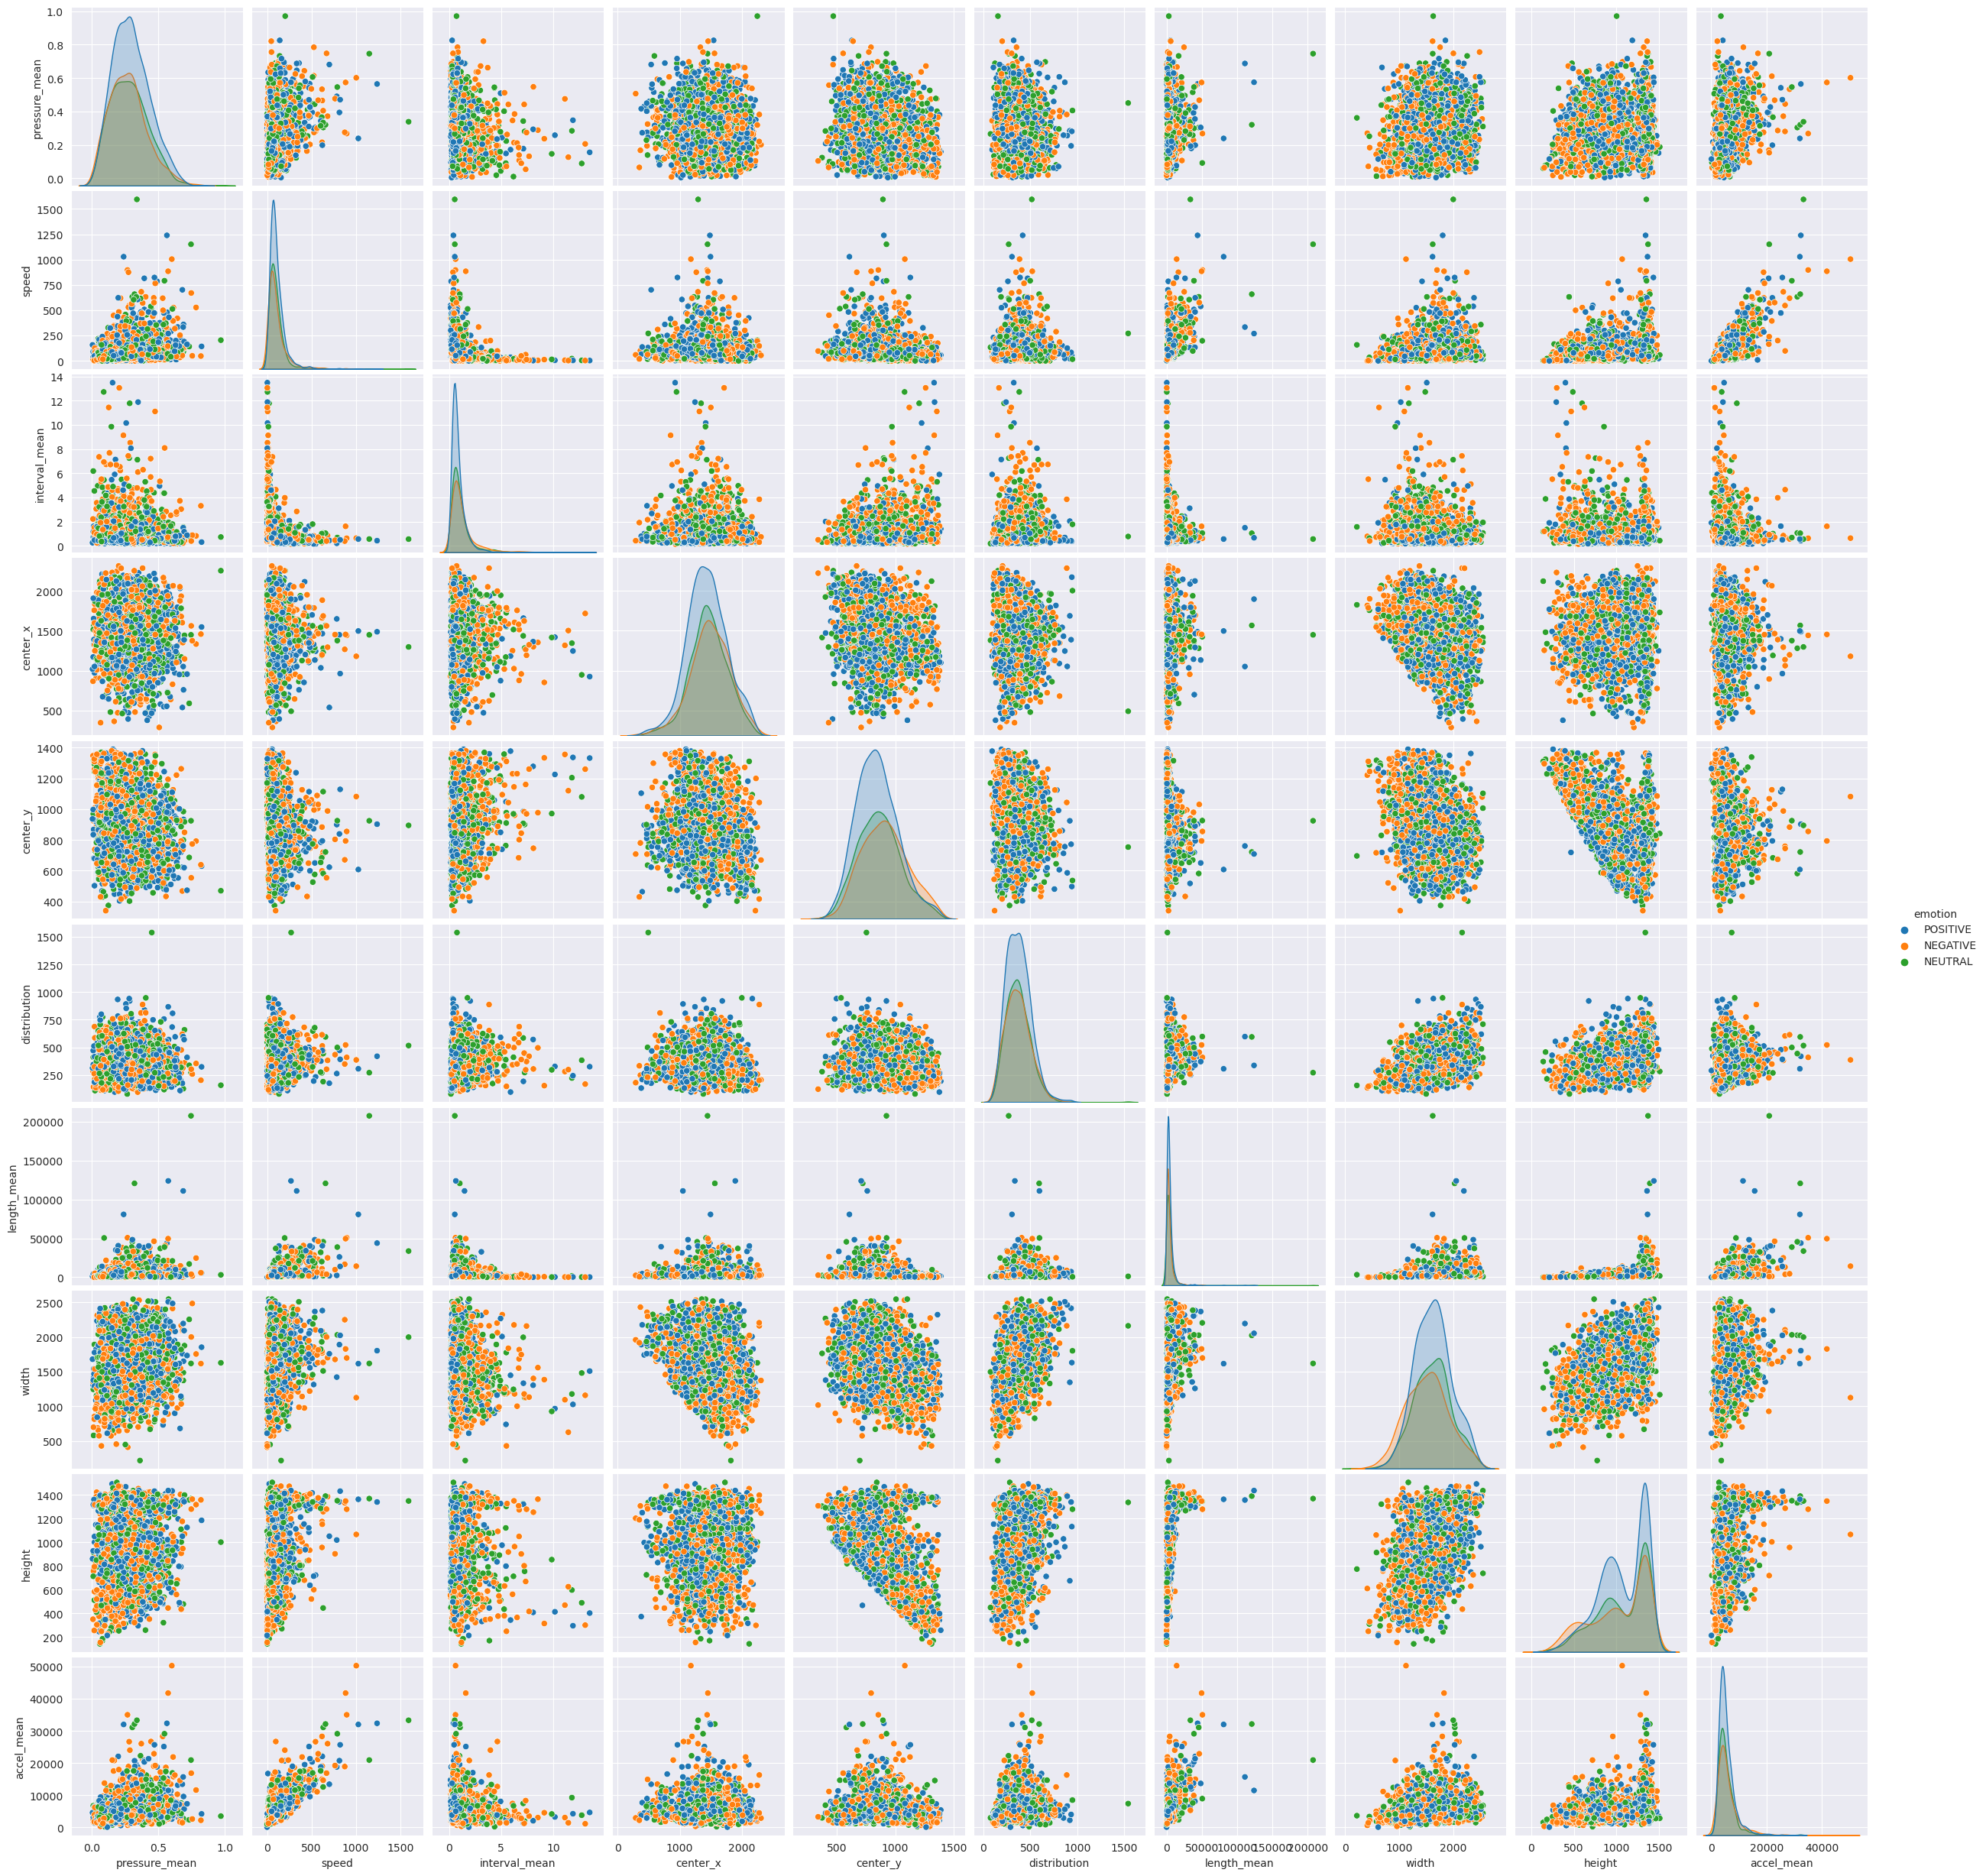

In [38]:
dataset_plot = data_df.drop(columns=['subquestionId', 'Unnamed: 0','studentId', 'stage', 'label', 'emotion_encoded','pressure_std', 'interval_std', 'accel_std'])
plot_group = dataset_plot.groupby('label_encoded')

x_train, x_test = train_test_split(dataset_plot, test_size=0.2, shuffle=True, random_state=34)
import seaborn as sns

sns.pairplot(x_test, hue = 'emotion')
